# Open Data Project

## Airbnb listings in Melbourne

    by Cathy Vu_z5061877

    github: cathyvu

The data I am discussing about today is sourced from the site Inside Airbnb. Which is a project primarily brought to us by Murray Cox; she conceived the project, then sourced the data from the publicly available information that is already provided by the Airbnb listings, proceeded to analyse it and then built the site.

The data presented is a snapshot of Melbourne’s listings on the 3rd of April, 2017. 

I personally chose to look into Melbourne’s listings as it is the city that many of my friends and I visit the most frequently, so getting a closer look at the listings available would hopefully aid me in planning future trips such as the one for Transmission.

## Generic library imports to get us started!

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

In [62]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

## Importing the Data Set from Inside Airbnb

In [63]:
#Loading dataset of AirBnB
if os.path.isfile("melb_listings.csv"):
    filepath = "melb_listings.csv"
    print "loading data set from file"
else:
    filepath = "http://data.insideairbnb.com/australia/vic/melbourne/2017-04-03/visualisations/listings.csv"
    print "loading data set from the internet"

melb_listings = pd.read_csv(filepath)
print "Completed!"

loading data set from file
Completed!


## A Summary of the data: The first 5 rows of Melbourne's Airbnb listings

In [68]:
#Getting the top 5 rows of data
melb_listings.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Separate,123157430,Eee,NaN,Greater Dandenong,-37.949196,145.151698,Private room,50,1,0,NaN,NaN,1,178
1,lge large,121801678,Ugarte,NaN,Greater Dandenong,-37.950484,145.148574,Private room,100,1,0,NaN,NaN,1,364
2,small and comfy .,22260925,Melroy,NaN,Greater Dandenong,-37.983177,145.171931,Private room,50,2,33,2017-02-28,1.11,1,333
3,study,121617802,Strickland,NaN,Greater Dandenong,-37.944460,145.152215,Private room,98,1,0,NaN,NaN,1,364
4,master bedroom,121617550,Choi,NaN,Greater Dandenong,-37.950239,145.146512,Private room,100,1,0,NaN,NaN,1,172


In [65]:
melb_listings.shape

(14305, 15)

The overall size of the entire data set consists of 14306 rows, and 16 columns.


So essentially 14306 listings all up! Though if you remember, this data is merely a snapshot. Some listings could have since been deleted or some could have been added.

In [66]:
melb_listings.columns

Index([u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365'],
      dtype='object')

The 16 columns consist of those shown above.

And that is the Airbnb individual ID, room name/description, host ID, host name or names, the latitudinal and longitudinal co-ordinates which then gives us the neighbourhood group which is basically the neighbourhood.
Then there's the room type which varies between an entire home or apartment, a private room, or a shared room.
Followed by its price in AUD, minimum nights per stay, total number of reviews for the listing, the date of the last review, an average amount of reviews per month, calculated host listings count (which can show us whether or not the host is running a business with multiple listings or not), and finally the rooms availability throughout the year!



## With this data, you can ask fundamental questions about Airbnb

### Such as the amount of listings within each neighbourhood

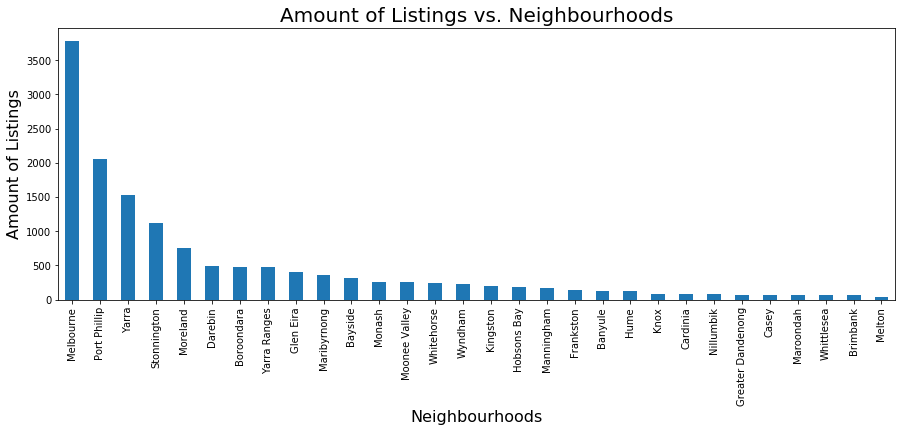

In [77]:
melb_listings["neighbourhood"].value_counts().plot(kind="bar")
plt.title("Amount of Listings vs. Neighbourhoods", fontsize=20)
plt.xlabel("Neighbourhoods", fontsize=16)
plt.ylabel("Amount of Listings", fontsize=16)

## Listings for the Greater Dandenong suburb only

In [75]:
greater_dandenong = melb_listings.iloc[0:73]
greater_dandenong

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Separate,123157430,Eee,NaN,Greater Dandenong,-37.949196,145.151698,Private room,50,1,0,NaN,NaN,1,178
1,lge large,121801678,Ugarte,NaN,Greater Dandenong,-37.950484,145.148574,Private room,100,1,0,NaN,NaN,1,364
2,small and comfy .,22260925,Melroy,NaN,Greater Dandenong,-37.983177,145.171931,Private room,50,2,33,2017-02-28,1.11,1,333
3,study,121617802,Strickland,NaN,Greater Dandenong,-37.944460,145.152215,Private room,98,1,0,NaN,NaN,1,364
4,master bedroom,121617550,Choi,NaN,Greater Dandenong,-37.950239,145.146512,Private room,100,1,0,NaN,NaN,1,172
5,Hotel in Dandenong,68813725,Ivy,NaN,Greater Dandenong,-37.976183,145.207178,Private room,125,1,0,NaN,NaN,4,365
6,Room for rent noble park,365556,Rebecca,NaN,Greater Dandenong,-37.969667,145.172255,Private room,60,1,0,NaN,NaN,1,365
7,Insaa Apartments Dandenong - 3BR Townhouse,39093981,Don,NaN,Greater Dandenong,-37.991689,145.203059,Entire home/apt,248,3,1,2016-12-16,0.28,5,360
8,A room with a double bed!,48639316,Cameron,NaN,Greater Dandenong,-37.958970,145.145906,Private room,39,2,5,2017-03-30,0.63,1,203
9,湿地旁的橄榄树之家 The olive tree house,60302994,Tao,NaN,Greater Dandenong,-38.003565,145.155980,Entire home/apt,218,1,33,2017-03-12,4.74,1,127


Looking at just the listings available for the Greater Dandenong region, 

In [72]:
greater_dandenong.plot.bar(x='price', y='', facecolor = 'magenta', alpha=0.5)
plt.title('Amount of Available Listings vs. Price', fontsize=24);
plt.ylabel('Amt. of Available Listings', fontsize=16);
plt.xlabel('Price in AUD', fontsize=16);

KeyError: ''